# Exploratory analysis of the WSJ headlines

In [156]:
import pandas as pd
import numpy as np

styr=1998
edyr=2019

nyrs = edyr-styr+1

nrows = np.empty([nyrs],int)

yrlst = []
catlst = []

i=0
for yr in np.arange(styr,edyr+1):
 #print('\n\tyr = ',yr)   
 fnm = 'data_new/WSJ_headlines_'+np.str(yr)+'.csv'
 yrlst.append(yr)
 df = pd.read_csv(fnm)
 #print('\t\tdf.shape = ',df.shape)
 #print('\t\tSUM na = ',df.isna().sum().sum())
 if df.isna().sum().sum() > 0:
  df.dropna(inplace=True)  
 #print('\t\tSUM na = ',df.isna().sum().sum())
 nrows[i] = df.shape[0]
 catlst.extend(df.category.unique())
 
 i += 1
    
print('\n\tTotal number of headlines = ',np.sum(nrows))    
print('\n\tTotal number of categories = ',len(catlst))    



	Total number of headlines =  1096930

	Total number of categories =  13869



Total nrows =  1096930


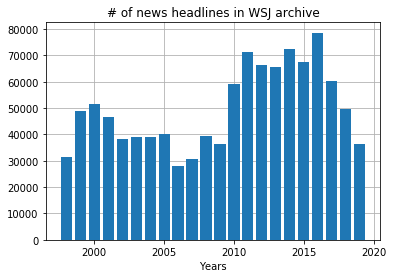

In [157]:
import matplotlib.pyplot as plt

print('\nTotal nrows = ',np.sum(nrows))

fig,ax = plt.subplots(1,1)
ax.bar(yrlst,nrows[:])
plt.grid(True) #; ax.zorder(0)
ax.set_axisbelow(True)
plt.title('# of news headlines in WSJ archive')
plt.xlabel('Years')
plt.show()

In [160]:
#print out unique categories in catlst

catset = set(catlst)

print('\n\tlen = ',len(catset))

#print(catset)


	len =  5785


## Filter out headlines from relevant categories.
WSJ publishes articles about culture, food etc which are not relevant to the stock market. The following searchtags (which are relevant to the stock market) are defined. Only articles whose category contains either of these tags are included.

In [4]:
import re

searchtags = ['auto','bank','barron', 'business','capital','commod', 'commerce', 'corporate', 
              'earning','econom', 'energy', 'estate', \
              'exchange' , 'executive','finance', 'fiscal', 'forex' , 'fund','gas','goldman', 'heard', \
              'industr', 'infra', 'insur', 'invest', 'innovation',\
              'logistics','market','money','oil', 'price','property', 'share', 'stock', 'street',\
              'tax','tech', 'telecom', \
              'trade','treasur',\
              'value','venture','wealth','wall','worth']

nrows_rel = np.empty([nyrs],int)

i=0
for yr in np.arange(styr,edyr+1):
 fnm = 'data_new/WSJ_headlines_'+np.str(yr)+'.csv'
 df = pd.read_csv(fnm)
 #print('\n\tyr = ',yr)
 if df.isna().sum().sum()>0:
  df.dropna(inplace=True)  
 #print('\t\tSUM na = ',df.isna().sum().sum())
 df_rel = df[df['category'].str.contains('|'.join(searchtags),regex=True,flags=re.IGNORECASE)]
 nrows_rel[i] = df_rel.shape[0]
 #print('\t\tnrows = ',nrows[i],nrows_rel[i])
 df_rel.to_csv('data_new/WSJ_relevant_headlines_'+np.str(yr)+'.csv',index=False)
 i += 1
    
print('\n\tSUM(rows_rel) = ',np.sum(nrows_rel))    


	SUM(rows_rel) =  520209



	SUM(nrows_rel) =  520209


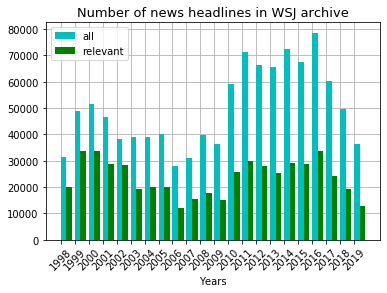

In [16]:
import matplotlib.pyplot as plt

print('\n\tSUM(nrows_rel) = ',np.sum(nrows_rel))

hd=[]
fig,ax = plt.subplots(1,1)
h1=ax.bar(np.arange(nyrs),nrows[:],width=0.4,align='edge',color='c'); hd.append(h1)
h1=ax.bar(np.arange(nyrs)+0.4,nrows_rel[:],width=0.4,align='edge',color='g'); hd.append(h1)
plt.legend(hd,['all','relevant'])
plt.grid(True)
ax.set_axisbelow(True)
plt.title('Number of news headlines in WSJ archive',fontsize=13)
plt.xticks(np.arange(edyr-styr+1),yrlst,rotation=45)
plt.xlabel('Years')

plt.savefig('figs/narticles_WSJ.png',bbox_inches="tight")

plt.show()

### Concatenate all years and write to a single file

In [161]:
styr=1998
edyr=2019

i=0
for yr in np.arange(styr,edyr+1):
 #print('\n\tyr = ',yr)
 fnm = 'data_new/WSJ_relevant_headlines_'+np.str(yr)+'.csv'
 if i==0:
  df = pd.read_csv(fnm)     
 else:
  dfnew = pd.read_csv(fnm)
  df = pd.concat([df,dfnew]).reset_index(drop=True)    
 i += 1

print('\n\tshape = ',df.shape)

#df.to_csv('data_new/WSJ_relevant_headlines_allyears.csv',index=False)


	shape =  (520209, 4)


In [99]:
df = pd.read_csv('data_new/WSJ_relevant_headlines_allyears.csv')
print('\nshape = ',df.shape)


shape =  (520209, 4)


In [162]:
import text_clean
import importlib
importlib.reload(text_clean)


df['clean_headline'] = df['headline'].apply(lambda x : text_clean.normalize_doc_abbre(x))

print('\n\tdf.shape = ',df.shape)

print(df.loc[10912,'headline'])
print(df.loc[10912,'clean_headline'])


	df.shape =  (520209, 5)
Baan to Buy CAPS Logistics
baan buy cap logist


## Which are the top occuring words in the headlines ?

In [163]:
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
from itertools import chain

nrows = df.shape[0]

print('\nnrows = ',nrows)

all_words_toks = []

for ii in np.arange(nrows):
 txt = df.iloc[ii]['clean_headline']   
 all_words_toks.append(word_tokenize(txt))

flat_all_words = list(chain(*all_words_toks))


nrows =  520209



len(flat_all_words) =  2629940

len(comm) =  20

labels =  ('stock', 'usa', 'market', 'profit', 'bank', 'share', 'new', 'rise', 'china', 'price', 'fund', 'plan', 'fall', 'sale', 'deal', 'rate', 'up', 'oil', 'take', 'investor')

ys =  [23062, 21421, 18594, 18543, 18098, 17178, 16796, 16473, 15156, 13289, 13247, 13024, 12335, 12234, 12033, 11467, 11210, 10469, 10220, 9075]

sum =  2629940

#  australian :  1020
#  deni :   553
#  vivendi :   483
#  america :  2524
#  balanc :   585
#  edg :  1885
#  set :  4626
#  electr :   824
#  number :   463
#  univers :   482


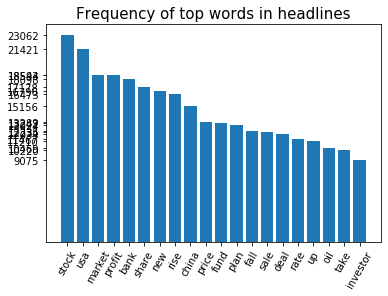

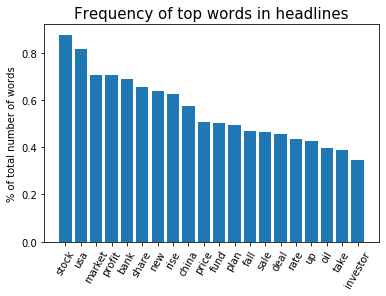

In [175]:
import random

print('\nlen(flat_all_words) = ',len(flat_all_words))

counter_obj = Counter(flat_all_words)
comm = counter_obj.most_common(20)

print('\nlen(comm) = ',len(comm))

plt.figure(1)
labels, ys = zip(*comm)
print('\nlabels = ',labels)
print('\nys = ',list(ys))

sm =  sum(counter_obj.values())
print('\nsum = ',sm)

fys = 100*np.asarray(ys)/float(sm)
#print('\nfys = ',fys)

xs = np.arange(len(labels)) 

plt.bar(xs, ys, width=0.8, align='center')
plt.xticks(xs, labels, rotation=60); #Replace default x-ticks with xs, then replace xs with labels
plt.yticks(ys);
plt.title('Frequency of top words in headlines',fontsize=15)
#plt.savefig('figs/freq_topwords_headlines.png', bbox_inches = 'tight')

plt.figure(2)
xs = np.arange(len(labels)) 
plt.bar(xs, fys, width=0.8, align='center')
plt.xticks(xs, labels, rotation=60);  
plt.ylabel('% of total number of words')
plt.title('Frequency of top words in headlines',fontsize=15)
plt.savefig('figs/freq_topwords_headlines_perc.png', bbox_inches = 'tight')

#Print few words with their frequencies
print('')
comm1000 = counter_obj.most_common(1000)

for key,value in random.sample(comm1000,10):
 print('#  {0:3s} : {1:5d}'.format(key,value))
 
plt.show()

wrds ('stock', 'usa', 'market', 'profit', 'bank', 'share', 'new', 'rise', 'china', 'price', 'fund', 'plan', 'fall', 'sale', 'deal', 'rate', 'up', 'oil', 'take', 'investor', 'gain', 'may', 'dollar', 'fed', 'bond', 'firm', 'million', 'buy', 'post', 'trade')


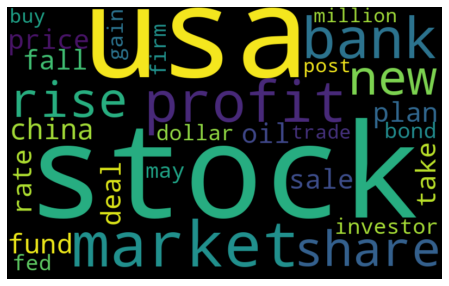

In [155]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

comm30 = counter_obj.most_common(30)

wrds, freq = zip(*comm30)

print('wrds',wrds)

wordcloud = WordCloud(width=800, height=500, max_words=30).generate(' '.join(wrds))

plt.figure(figsize=(8, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.savefig('figs/wordcloud_topwords.png', bbox_inches = 'tight')
plt.show()

